# Proyecto Final Karina Cardozo
# p4_Clustering

# 1) Cargamos los datos 📕

In [3]:
import pandas as pd
from ydata_profiling import ProfileReport
from funpymodeling.exploratory import status, freq_tbl
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv("data/ohe_customer_dataset.csv", sep=",")

In [5]:
data.head(3)

,transactionFailed,fraudulent,"orderAmount_(9.999, 18.4]","orderAmount_(18.4, 30.0]","orderAmount_(30.0, 39.0]","orderAmount_(39.0, 47.0]","orderAmount_(47.0, 353.0]",orderAmount_desconocido,orderState_failed,orderState_fulfilled,...,emailProvider_gmail,emailProvider_hotmail,emailProvider_other,emailProvider_weird,emailProvider_yahoo,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_letters,sameCity_no,sameCity_unknown,sameCity_yes
0,False,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,False,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
2,False,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0


In [6]:
#Generamos un dataframe de las columnas que nos interesa analizar
filter_data = data[["orderState_failed", "orderState_fulfilled", "orderState_pending", "transactionFailed", "fraudulent", "customerIPAddressSimplified_digits_and_letters"]].copy()

# 2) Clustering con K-Means 🎯

In [7]:
status(filter_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderState_failed,0,0.0,573,0.919743,2,int64
1,orderState_fulfilled,0,0.0,223,0.357945,2,int64
2,orderState_pending,0,0.0,595,0.955056,2,int64
3,transactionFailed,0,0.0,455,0.730337,2,bool
4,fraudulent,0,0.0,107,0.171750,3,int64
5,customerIPAddressSimplified_digits_and_letters,0,0.0,546,0.876404,2,int64


In [8]:
filter_data.describe()

,orderState_failed,orderState_fulfilled,orderState_pending,fraudulent,customerIPAddressSimplified_digits_and_letters
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.080257,0.642055,0.044944,1.558587,0.123596
std,0.271909,0.479781,0.207347,0.768775,0.329384
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,2.000000,0.000000
75%,0.000000,1.000000,0.000000,2.000000,0.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000


## 2.1) Tenemos que normalizar los datos (z-score)

In [9]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(filter_data)
x_data_norm=std_scaler.transform(filter_data)

# Revisamos lo que hizo
pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5
count,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02
mean,5.702590e-18,4.562072e-17,-2.281036e-17,4.847202e-17,-9.124144e-17,-2.281036e-17
std,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00
min,-2.953981e-01,-1.339299e+00,-2.169305e-01,-6.076436e-01,-2.028993e+00,-3.755338e-01
25%,-2.953981e-01,-1.339299e+00,-2.169305e-01,-6.076436e-01,-7.271779e-01,-3.755338e-01
50%,-2.953981e-01,7.466592e-01,-2.169305e-01,-6.076436e-01,5.746377e-01,-3.755338e-01
75%,-2.953981e-01,7.466592e-01,-2.169305e-01,1.645701e+00,5.746377e-01,-3.755338e-01
max,3.385262e+00,7.466592e-01,4.609772e+00,1.645701e+00,5.746377e-01,2.662876e+00


## 4.2) Creación del modelo

In [10]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=3,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

KMeans(max_iter=100, n_clusters=3, n_init='auto', random_state=0)

In [11]:
pred_cl = cl_model.predict(x_data_norm)

## 4.3) Analizando el modelo final: Gráfico de coordenadas

In [12]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl[cluster_var]=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados

In [13]:
x_data_cl.head()

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0,0,1,False,0,0,0
1,0,1,0,False,1,0,1
2,0,1,0,False,0,1,2
3,0,1,0,False,0,1,2
4,0,1,0,True,1,0,1


In [14]:
from funpymodeling.model_validation import coord_plot

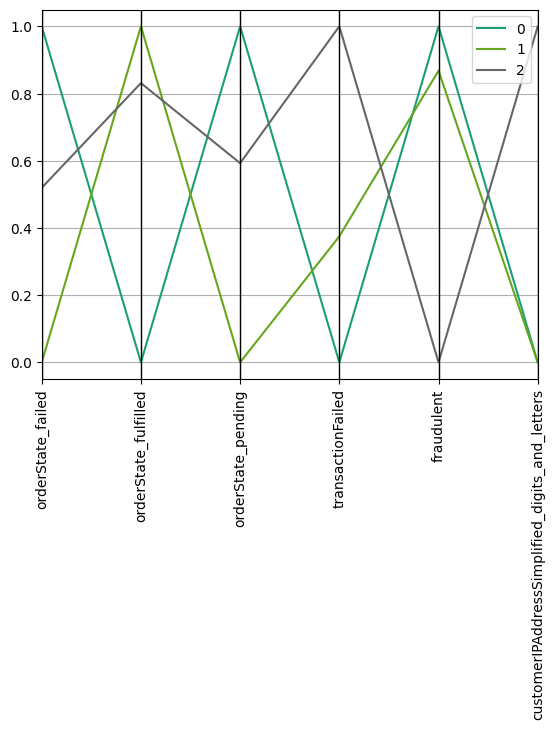

In [15]:
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

**Insights 💡**

**Cluster 0:** Este cluster es mayormente de clientes fraudulentos o con un alto riesgo de fraude, se caracteriza por tener pedidos (ordenes) en estado fallido o pendiente, con una baja tasa de transacciones que no han fallado (transactionFailed = 0.26) y el número de IP no posee letras.

**Cluster 1:** Este cluster es mayormente de clientes fraudulentos o con un alto riesgo de fraude,  se caracteriza porque todos los pedidos (ordenes) se encuentran completos, con una baja proporción de transacciones que no han fallado (transactionFailed = 0.27) y el número de IP no posee letras.

**Cluster 2:** Este cluster se representa mayormente por clientes no fraudulentos,  se caracteriza porque tiene pedidos en los diferentes estados: fallido (0.10), completo (0.83) y pendiente(0.06).  Con una baja proporción de transacciones que no han fallado (transactionFailed = 0.28) y el número de IP posee letras.

In [17]:
d_orig

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0.200000,0.000000,0.109524,0.261905,1.857143,0.0,0
1,0.000000,1.000000,0.000000,0.270833,1.654762,0.0,1
2,0.103896,0.831169,0.064935,0.285714,0.324675,1.0,2


In [16]:
d_transf

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,1.000000,0.000000,1.000000,0.000,1.000000,0.0,0
1,0.000000,1.000000,0.000000,0.375,0.867938,0.0,1
2,0.519481,0.831169,0.592885,1.000,0.000000,1.0,2


## Scatter 3D

In [19]:
import plotly.express as px

fig = px.scatter_3d(data, x='orderState_failed', y='customerIPAddressSimplified_digits_and_letters', z='transactionFailed', color='fraudulent')
fig.show()

# 5) Clustering con HDBSCAN 🤖

## 5.1) Tuning/regularización de HDBSCAN para menos clusters

In [20]:
import hdbscan

In [21]:
# Ese 15 significa que cada cluster va a tener como mínimo 15 casos
model_hdb2 = hdbscan.HDBSCAN(min_cluster_size=15).fit(filter_data)

In [22]:
freq_tbl(model_hdb2.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,6,196,0.314607,0.314607
1,8,105,0.168539,0.483146
2,-1,94,0.150883,0.634029
3,2,67,0.107544,0.741573
4,3,41,0.065811,0.807384
5,4,30,0.048154,0.855538
6,1,27,0.043339,0.898876
7,5,24,0.038523,0.9374
8,7,23,0.036918,0.974318
9,0,16,0.025682,1.0


## 5.3) Análisis del modelo cluster (profiling)

In [23]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos
x_data_cl[cluster_var]=model_hdb2.labels_ # ojo aca! el predict es de los datos normalizados

In [24]:
x_data_cl.head()

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0,0,1,False,0,0,-1
1,0,1,0,False,1,0,5
2,0,1,0,False,0,1,4
3,0,1,0,False,0,1,4
4,0,1,0,True,1,0,-1


In [25]:
#Sacamos el cluster de ruido:
x_data_cl=x_data_cl[x_data_cl['cluster']!=-1]

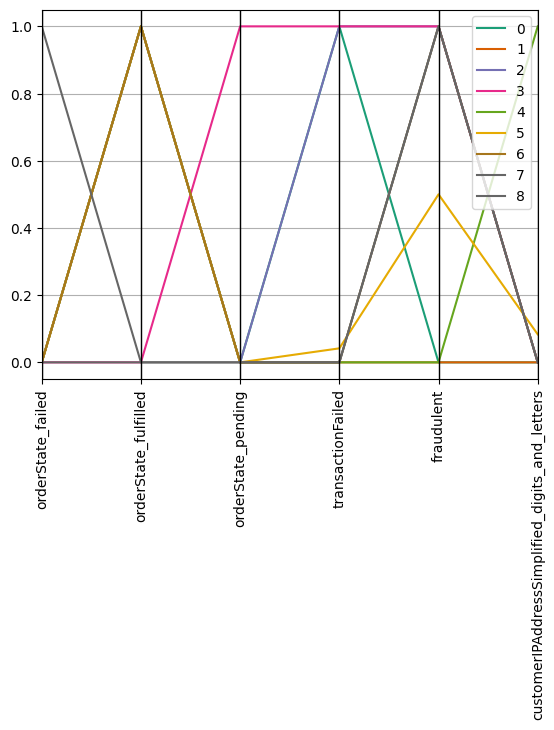

In [26]:
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

**Insights 💡**

**Cluster 0:** Este cluster no tiene fraudulentos,  se caracteriza porque el estado del pedido fue completado, todas sus transacciones fallaron y el número de IP no posee letras.

**Cluster 1:** Este cluster no tiene fraudulentos,  se caracteriza porque el estado del pedido fue completado, ninguna de sus transacciones falló y el número de IP no posee letras.

**Cluster 2:** Este cluster es de clientes con riesgo de ser fraudulentos (warning), se caracteriza porque el estado del pedido fue completado, sus transacciones han sido fallidas y el número de IP no posee letras.

In [28]:
d_orig

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0.0,1.0,0.00000,1.000000,0.0,0.000000,0
1,0.0,1.0,0.00000,0.000000,0.0,0.000000,1
2,0.0,1.0,0.00000,1.000000,2.0,0.000000,2
3,0.0,0.0,0.02439,1.000000,2.0,0.000000,3
4,0.0,1.0,0.00000,0.000000,0.0,1.000000,4
5,0.0,1.0,0.00000,0.041667,1.0,0.083333,5
6,0.0,1.0,0.00000,0.000000,2.0,0.000000,6
7,1.0,0.0,0.00000,0.000000,2.0,0.000000,7
8,0.0,0.0,0.00000,0.000000,2.0,0.000000,8


In [27]:
d_transf

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0.0,1.0,0.0,1.000000,0.0,0.000000,0
1,0.0,1.0,0.0,0.000000,0.0,0.000000,1
2,0.0,1.0,0.0,1.000000,1.0,0.000000,2
3,0.0,0.0,1.0,1.000000,1.0,0.000000,3
4,0.0,1.0,0.0,0.000000,0.0,1.000000,4
5,0.0,1.0,0.0,0.041667,0.5,0.083333,5
6,0.0,1.0,0.0,0.000000,1.0,0.000000,6
7,1.0,0.0,0.0,0.000000,1.0,0.000000,7
8,0.0,0.0,0.0,0.000000,1.0,0.000000,8
